In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.shape

(887, 8)

In [4]:
df.dropna().shape

(887, 8)

In [8]:
df['Age'].fillna(-1, inplace=True)

In [10]:
X = df.drop(['Survived', 'Name'], axis=1)
X.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [11]:
mf = {'male': 0, 'female':1}
X['Sex'] = X['Sex'].map(mf)
X.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [12]:
y = df.Survived

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

# Validation

In [61]:
(y_pred == y_test).sum()/len(y_test)

0.7915492957746478

# F1 Score

In [60]:
print('True Negatives', end=' ')
print(((y_test==0) & (y_test==y_pred)).sum())

print('True Positives', end=' ')
print(((y_test==1) & (y_test==y_pred)).sum())

print('False Negatives', end=' ')
print(((y_test==1) & (y_test!=y_pred)).sum())

print('False Positives', end=' ')
print(((y_test==0) & (y_test!=y_pred)).sum())

True Negatives 387
True Positives 175
False Negatives 96
False Positives 52


In [62]:
confusion_matrix(y_test, y_pred)

array([[387,  52],
       [ 96, 175]], dtype=int64)

In [63]:
confusion_matrix(y_test, y_pred, normalize='true')

array([[0.88154897, 0.11845103],
       [0.35424354, 0.64575646]])

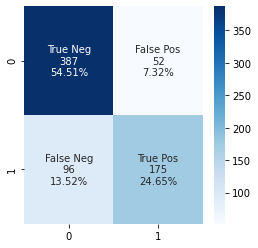

In [67]:
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(4,4))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [68]:
175/(175+0.5*(52+96))

0.7028112449799196

In [69]:
f1_score(y_test, y_pred)

0.7028112449799198

# Logistic Regression

In [38]:
model1 = LogisticRegression(solver='liblinear', random_state=0, max_iter = 1000).fit(X_train,y_train)

In [39]:
model1.coef_

array([[-7.02124308e-01,  2.43252589e+00, -3.52591739e-02,
        -2.45111160e-01, -3.01844584e-01,  2.07964680e-03]])

In [66]:
pd.DataFrame(confusion_matrix(y_train, model1.predict(X_train)))
conf1 = confusion_matrix(y_train, model1.predict(X_train))
Sensitivity = round(conf1[1,1]/(conf1[1,1]+conf1[0,1]),2)
Specificity = round(conf1[0,0]/(conf1[0,0]+conf1[1,0]),2)
Precision = round(conf1[1,1]/(conf1[1,1]+conf1[1,0]),2)
accuracy = round((conf1[1,1]+conf1[0,0])/(conf1[1,1]+conf1[0,0] + conf1[1,0]+conf1[0,1]),2)
Sensitivity, Specificity, Precision, accuracy

(0.83, 0.83, 0.73, 0.83)

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

model2= DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10).fit(X_train, y_train)

In [34]:
model2.score(X_train, y_train)

0.8418079096045198

In [37]:
pd.DataFrame(confusion_matrix(y_train, model2.predict(X_train)))
conf2 = confusion_matrix(y_train, model2.predict(X_train))
Sensitivity = round(conf2[1,1]/(conf2[1,1]+conf2[0,1]),2)
Specificity = round(conf2[0,0]/(conf2[0,0]+conf2[1,0]),2)
Precision = round(conf2[1,1]/(conf2[1,1]+conf2[1,0]),2)
accuracy = round((conf2[1,1]+conf2[0,0])/(conf2[1,1]+conf2[0,0] + conf2[1,0]+conf2[0,1]),2)
Sensitivity, Specificity, Precision, accuracy

(0.89, 0.82, 0.69, 0.84)

# Random Forest

In [43]:
model3 = RandomForestClassifier(n_estimators = 100, random_state = 1, max_depth =5).fit(X_train,y_train)

In [44]:
pd.DataFrame(confusion_matrix(y_train, model3.predict(X_train)))
conf3 = confusion_matrix(y_train,model3.predict(X_train))
Sensitivity = round(conf3[1,1]/(conf3[1,1]+conf3[0,1]),2)
Specificity = round(conf3[0,0]/(conf3[0,0]+conf3[1,0]),2)
Precision = round(conf3[1,1]/(conf3[1,1]+conf3[1,0]),2)
accuracy = round((conf3[1,1]+conf3[0,0])/(conf3[1,1]+conf3[0,0] + conf3[1,0]+conf3[0,1]),2)
Sensitivity, Specificity, Precision, accuracy

(0.9, 0.86, 0.77, 0.88)

# Ada Boost

In [53]:
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy_score(y_pred, y_test)

0.7887323943661971

In [56]:
table = pd.DataFrame({"Model": ["Logistic Regression", "Decision Tree",
                                "Random Forest", "Ada Boost"],
                     "Accuracy Scores": ["0.83", "0.84", "0.88", "0.79"],
                
})

table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores
Model,
Random Forest,0.88
Decision Tree,0.84
Logistic Regression,0.83
Ada Boost,0.79
